In [1]:
import pandas as pd


In [3]:
df=pd.read_csv("/content/comments_TJA_Live - comments_TJA_Live.csv")

In [4]:
len(df)

38969

In [5]:
filtered_df = df[~df['Language'].isin(['und', 'te'])]

In [6]:
len(filtered_df)

38039

In [7]:
filtered_df = filtered_df[['Translated']]

In [8]:
filtered_df.dropna(inplace=True)

In [9]:
len(filtered_df)

38038

In [10]:
filtered_df = filtered_df[['Translated']].head(10000)

In [11]:
filtered_df['Translated'] = filtered_df['Translated'].astype(str)

Preprocessing

In [12]:
corpus = filtered_df['Translated'].tolist()

In [13]:
corpus = [text for text in corpus if pd.notna(text)]

In [14]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
corpus = [str(comment) for comment in filtered_df['Translated']]

In [16]:
import re

def is_english(text):
    return bool(re.match('^[a-zA-Z\s]+$', text))

def filter_corpus(corpus):
    filtered_corpus = []
    for line in corpus:
        clean_line = re.sub(r'[^a-zA-Z\s]', '', line)
        if is_english(clean_line):
            filtered_corpus.append(clean_line.strip())
    return filtered_corpus


filtered_corpus = filter_corpus(corpus)


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

nltk_preprocessed_corpus = []
# Custom list of stopwords
custom_stopwords = ['jai', 'jiii','hello','Jai', 'jagananna', 'jaijagan','ap','namasta','ki','sir','ok','superjagnanna','Jagan anna', 'superjagnanna','Jagannanna','jaganna','jagnanna','anana','jagganna','hi','pics','anna hi','jahan anna','janan','anna','anna jagan','yes','jagan','jagan jagan','anna anna','jagnnanna','jagannanna','jjagan','mohan','reddy','andhra','pradesh','jagnanaa']

for document in filtered_corpus:
    # Tokenization
    tokens = word_tokenize(document.lower())

    # Remove stopwords and punctuation
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    tokens = [word for word in tokens if 'jagan' not in word]
    tokens = [word for word in tokens if 'jagna' not in word]
    tokens = [word for word in tokens if 'anna' not in word]
    tokens = [word for word in tokens if 'hi' not in word]
    tokens = [word for word in tokens if 'sir' not in word]
    tokens = [word for word in tokens if 'jai' not in word]
    tokens = [word for word in tokens if 'cm' not in word]
    tokens = [word for word in tokens if 'jay' not in word]
    tokens = [word for word in tokens if 'garu' not in word]
    tokens = [word for word in tokens if 'ycp' not in word]
    tokens = [word for word in tokens if 'congress' not in word]
    tokens = [word for word in tokens if 'ysr' not in word]
    tokens = [word for word in tokens if 'mla' not in word]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    nltk_preprocessed_corpus.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
clean_corpus = [lst for lst in nltk_preprocessed_corpus if lst]

BERT Model using HDBSCAN and UMAP

In [19]:
%%capture
!pip install bertopic

In [21]:
from bertopic import BERTopic

In [22]:
# Flatten list of lists into a single list of strings
flat_corpus = [item for sublist in clean_corpus for item in sublist]

# Initialize BERTopic model
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit BERTopic model with the preprocessed messages
topics, probs = topic_model.fit_transform(flat_corpus)


2024-03-21 09:20:59,247 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/271 [00:00<?, ?it/s]

2024-03-21 09:21:39,817 - BERTopic - Embedding - Completed ✓
2024-03-21 09:21:39,819 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-21 09:22:49,809 - BERTopic - Dimensionality - Completed ✓
2024-03-21 09:22:49,813 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-21 09:23:23,886 - BERTopic - Cluster - Completed ✓
2024-03-21 09:23:23,909 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-21 09:23:24,123 - BERTopic - Representation - Completed ✓


In [24]:
topic_model.get_topic(0)  # Select the most frequent topic

[('sidham', 0.07651388838858905),
 ('sidhamu', 0.008144361223763885),
 ('sidhamsidhhm', 0.008144361223763885),
 ('sidhame', 0.008144361223763885),
 ('sidhamaa', 0.008144361223763885),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05)]

In [25]:
topic_model.topics_[:10]

[90, 31, 12, 47, 30, -1, -1, 191, 5, 5]

In [26]:
topic_model.visualize_topics()

In [28]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [32]:
topic_model.update_topics(flat_corpus, n_gram_range=(0,1))

In [33]:
topic_model.get_topic(0)   # We select topic that we viewed before

[('sidham', 0.07651388838858905),
 ('sidhamu', 0.008144361223763885),
 ('sidhamsidhhm', 0.008144361223763885),
 ('sidhame', 0.008144361223763885),
 ('sidhamaa', 0.008144361223763885),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05)]

In [34]:
topic_model.reduce_topics(flat_corpus, nr_topics=60)

2024-03-21 09:33:08,043 - BERTopic - Topic reduction - Reducing number of topics
2024-03-21 09:33:08,188 - BERTopic - Topic reduction - Reduced number of topics from 233 to 60


In [35]:
topic_model.get_topic(0)

[('sidham', 0.10277114113072044),
 ('siddam', 0.09866416224504629),
 ('siddham', 0.09787087099827584),
 ('sidam', 0.028517315404497853),
 ('siddame', 0.0272283689301547),
 ('siddamu', 0.01811232990508617),
 ('siddhame', 0.0143116498600592),
 ('sedham', 0.009856596513457796),
 ('siddem', 0.009856596513457796),
 ('sidaam', 0.009856596513457796)]

In [37]:
topic_model.get_topic(6)

[('next', 0.19965825970442885),
 ('best', 0.15298311211137164),
 ('ni', 0.10053852337801945),
 ('one', 0.10053852337801945),
 ('help', 0.06993371880117479),
 ('hello', 0.06385548140712062),
 ('check', 0.06385548140712062),
 ('latest', 0.06385548140712062),
 ('confirm', 0.057386923841306656),
 ('updated', 0.057386923841306656)]

In [40]:
topic_model.get_topic(13)

[('water', 0.2898901887486155),
 ('bottle', 0.15535210937446886),
 ('medium', 0.14601952502440071),
 ('drinking', 0.11493986653281711),
 ('video', 0.11493986653281711),
 ('channel', 0.11493986653281711),
 ('mineral', 0.10329646291435197),
 ('youtube', 0.10329646291435197),
 ('card', 0.10329646291435197),
 ('song', 0.09082095640924055)]

In [113]:
sentences_with_sorry = []

for item in corpus:
    if isinstance(item, str):
        if "bottle" in item.lower():
            sentences_with_sorry.append(item)
    else:
        for sentence in item:
            if isinstance(sentence, str):
                if "bottle" in sentence.lower():
                    sentences_with_sorry.append(sentence)

for idx, sentence in enumerate(sentences_with_sorry, start=1):
    print(f"Sentence {idx}: {sentence}")

Sentence 1: WATER BOTTLES MUST PRINT....PH VALUE OF DRINKING WATER MENSION....HEALTH MINISTRY
Sentence 2: INTELLIGENCE  CHECK ON WATER BOTTLES...PH VALUE
Sentence 3: WATER PH VALUE....CHECK...ON WATER BOTTLES...RAIDINGS ON
Sentence 4: POLITICAL LEADERS USING WATERBOTTLES...PH VALUE...CHECK....AVOID CANCERS,DIABETIES..
Sentence 5: SIMPLE THING....CHECK PH VALUE...ON WATER BOTTLES
Sentence 6: POLITICAL LEADERS USING WATER BOTTLES PH VALUE CHECK
Sentence 7: POLITICAL LEADERS HEALTH ....MAINTAIN DRINKING WATER PH VALUE MUST 6.8 TO 6.9....AVOID CANCER,DIABETIES...RESEARCH ON WATER PH VALUE....JAI JAGAN...LEADERS USING WATER BOTTLES ...PH VALUE...CHECK...
Sentence 8: CHECK PH VALUE ON WATER BOTTLES...
Sentence 9: PH VALUE...2.0...CANCERS....PH VALUE...4.2...DIABETIES....WATER BOTTLES CHECK....PH VALUE....RAIDS ON MINERAL PLANTS...
Sentence 10: POLITICAL LEADERS....TAKE CARE ...ABOUT WATER BOTTLES...PH VALUE...MUST 6.9....RAIDS ON MINERAL PLANTS...
Sentence 11: TAKE CARE ABOUT WATER BOTTLES P

In [119]:
sentences_with_sorry = []

for item in corpus:
    if isinstance(item, str):
        if "mineral" in item.lower():
            sentences_with_sorry.append(item)
    else:
        for sentence in item:
            if isinstance(sentence, str):
                if "mineral" in sentence.lower():
                    sentences_with_sorry.append(sentence)

for idx, sentence in enumerate(sentences_with_sorry, start=1):
    print(f"Sentence {idx}: {sentence}")

Sentence 1: RAIDINGS NEED ON MINERAL WATER PLANTS....PH VALUE ....MUST MAINTAIN...6.8 TO  6.9...OTHERWISE CANCER,PH VALUE...2.0....DIABETIES...PH VALUE...4.2......PLEASE CHECK WATER DRINKING....WATER IN DANGER....TAKE ACTION...
Sentence 2: RAIDINGS ON MINERAL WATER PLANTS....CHECK PH VALUE...MUST 6.9...AVOID CANCER,DIABETIES
Sentence 3: PH VALUE...2.0...CANCERS....PH VALUE...4.2...DIABETIES....WATER BOTTLES CHECK....PH VALUE....RAIDS ON MINERAL PLANTS...
Sentence 4: RAIDS on mineral plants...check pH value
Sentence 5: POLITICAL LEADERS....TAKE CARE ...ABOUT WATER BOTTLES...PH VALUE...MUST 6.9....RAIDS ON MINERAL PLANTS...
Sentence 6: POLITICAL LEADERS CHECK...WATER BOTTLES PH VALUE MENTION....RAIDS ON MINERAL WATER PLANTS ...IN A.P....CHECK...AVOID CANCER,DIABETIES...


In [83]:
topic_model.get_topic(10)

[('team', 0.3358635267363683),
 ('join', 0.21894592550686037),
 ('cp', 0.1850247406131105),
 ('volunteer', 0.1456429815655559),
 ('co', 0.13088935369284324),
 ('connect', 0.13088935369284324),
 ('together', 0.13088935369284324),
 ('community', 0.13088935369284324),
 ('member', 0.1150813488747226),
 ('tq', 0.1150813488747226)]

In [122]:
sentences_with_sorry = []

for item in corpus:
    if isinstance(item, str):
        if "connect" in item.lower():
            sentences_with_sorry.append(item)
    else:
        for sentence in item:
            if isinstance(sentence, str):
                if "connect" in sentence.lower():
                    sentences_with_sorry.append(sentence)

for idx, sentence in enumerate(sentences_with_sorry, start=1):
    print(f"Sentence {idx}: {sentence}")

Sentence 1: ఎన్ని బస్ లు పెడితే ఇంతమంది జనం వస్తారు రా పిల్ల‌ సైనిక్స్...
అన్న బయలు దేరాడు...
ఇక పూనకాలే...
అనంతపురం సిద్ధం...🔥🔥🔥

#Siddham 
#CMYSJagan 
#YSJaganAgain #YSRCP
#AndhraPradesh
  #KiranCherukuri20 #YsrcpSocialmedia #JaganannaConnects #Bapatla
Sentence 2: Welcome to the official website of Jagan Army, the dedicated social media team supporting Prasadu Dasari - the CO Convenor of YSRCP Tekkali Mandal. Join us in our campaign for progress and social welfare in Tekkali and Srikakulam. Stay updated with the latest news, events, and initiatives of YSR Congress Party and its dynamic leader, YS Jagan Mohan Reddy. Connect with us on Facebook at https://www.facebook.com/profile.php?id=100014436363499&mibextid=ZbWKwL and explore our insightful videos on our YouTube channel @JaganArmy175. Together, let's build a brighter future for our community. Join the Jagan Army today! #GoodMorning #JaganArmy #PrasaduDasari #YSRCP_Tekkali #YSRCPSocialMedia #YSRCongressParty #Tekkali #Srikakulam #YS

In [85]:
topic_model.get_topic(12)

[('party', 0.3851434081647801),
 ('vote', 0.18076309609388777),
 ('army', 0.15903534887562992),
 ('political', 0.14298577230983453),
 ('news', 0.11586034010343882),
 ('mp', 0.11586034010343882),
 ('government', 0.11586034010343882),
 ('sabha', 0.09507385890126922),
 ('campaign', 0.09507385890126922),
 ('welfare', 0.09507385890126922)]

In [124]:
sentences_with_sorry = []

for item in corpus:
    if isinstance(item, str):
        if "vote" in item.lower():
            sentences_with_sorry.append(item)
    else:
        for sentence in item:
            if isinstance(sentence, str):
                if "vote" in sentence.lower():
                    sentences_with_sorry.append(sentence)

for idx, sentence in enumerate(sentences_with_sorry, start=1):
    print(f"Sentence {idx}: {sentence}")

Sentence 1: a Jessica Jasmine vote for fan
Sentence 2: Fan gurthukey mana vote
Sentence 3: love jagan vote jagan
Sentence 4: jagan ke maa vote
Sentence 5: anna paatha manifestoo tisukoni vachi vote adagamandi
Sentence 6: ఈ మీటింగ్ తో ప్రతిపక్షాలు తమకు అనుకూలంగా ఎవరూ vote వెయ్యరని అనిపించాలి
జై జగన్ 
Sentence 7: vote for YSR Congress
Sentence 8: JAI JAGANANNA THE BEST YOUNG AND DYNAMIC CM OF AP IN 2024

A THUNDEROUS VICTORY IN 2024

JAI JANANETHA

JAI YSRCP JAI YSRCP

VOTE FOR FAN VOTE FOR FAN

NENU SIDDHAM NENU SIDDHAM

BALIREDDY PRATAP REDDY

M.SC.M.A.B.Ed.

SENIOE LECTURER IN ENGLISH

M.L.A. CONTESTANT OF CHANDRAGIRI AND PUNGANUR CONSTITUENCY

NATIVE OF BALIREDDYGARIPALLI

PULICHERLA

TIRUPATI

CHITTOOR AP

CELL9704188969
Sentence 9: memu vote ku Siddham Jai jagan
Sentence 10: 2024 mana vote jagananna ki
Sentence 11: prati second VALUABLE Prati VOTE VALUABLE JAGAN SIR KEENLY observe every moment of BABU N PAWAN
Sentence 12: jai jagananna vote for fan
Sentence 13: nenu. video nu. Anna

In [126]:
sentences_with_sorry = []

for item in corpus:
    if isinstance(item, str):
        if "mp" in item.lower():
            sentences_with_sorry.append(item)
    else:
        for sentence in item:
            if isinstance(sentence, str):
                if "mp" in sentence.lower():
                    sentences_with_sorry.append(sentence)

for idx, sentence in enumerate(sentences_with_sorry, start=1):
    print(f"Sentence {idx}: {sentence}")

Sentence 1: hello sir..My name is V.Sony..Iam studying btech and Iam a convener student..with ur help and these courses..now we are easily completing these courses without any fee..thanks for ur help sir..jai jagan
Sentence 2: Our Slogan 
Jai Jagan
Jagan Once Again 
No Compromise 
🇸🇱🎯🔥
Sentence 3: good evening brother due to one of government employee rest of the family members are not getting government schemes rest members no jobs
Sentence 4: Annanekosampranameyyanupranampoyedakanekosamporadatanu


Sentence 5: Download and participate in Mini Election AP survey 
https://play.google.com/store/apps/details?id=com.mycompany.thatasthaservey&pcampaignid=web_share
Sentence 6: Naiduvaripalem,Adavuladeevi, Nizampatnam Mandal,Bapatla Dist.Nenu Sidham
Sentence 7: jai Jagan 💙🤍💚
jai vellampalli 💙🤍💚
Vijayawada 
Sentence 8: jaganankosamprajajalandhrusidhhm
Sentence 9: 175/175 MP 25/25  yes, we are ready.
Sentence 10: Anna Govt Employees ki PRC Ivvandi vallu andaru manaku Support chestaru, Present 

In [110]:
sentences_with_sorry = []

for item in corpus:
    if isinstance(item, str):
        if "government" in item.lower():
            sentences_with_sorry.append(item)
    else:
        for sentence in item:
            if isinstance(sentence, str):
                if "government" in sentence.lower():
                    sentences_with_sorry.append(sentence)

for idx, sentence in enumerate(sentences_with_sorry, start=1):
    print(f"Sentence {idx}: {sentence}")

Sentence 1: good evening brother due to one of government employee rest of the family members are not getting government schemes rest members no jobs
Sentence 2: jai jagan anna government vachedi Guntur social media
Sentence 3: Good Government YSRCP JAI JAGANANNA
Sentence 4: once more Jagananna Government
Sentence 5: government department my party aunty I don't care Jagan CM 2024
Sentence 6: Jagan Babu will only form the government. No doubt at all.
Sentence 7: good government


In [112]:
sentences_with_sorry = []

for item in corpus:
    if isinstance(item, str):
        if "campaign" in item.lower():
            sentences_with_sorry.append(item)
    else:
        for sentence in item:
            if isinstance(sentence, str):
                if "campaign" in sentence.lower():
                    sentences_with_sorry.append(sentence)

for idx, sentence in enumerate(sentences_with_sorry, start=1):
    print(f"Sentence {idx}: {sentence}")

Sentence 1: Download and participate in Mini Election AP survey 
https://play.google.com/store/apps/details?id=com.mycompany.thatasthaservey&pcampaignid=web_share
Sentence 2: Welcome to the official website of Jagan Army, the dedicated social media team supporting Prasadu Dasari - the CO Convenor of YSRCP Tekkali Mandal. Join us in our campaign for progress and social welfare in Tekkali and Srikakulam. Stay updated with the latest news, events, and initiatives of YSR Congress Party and its dynamic leader, YS Jagan Mohan Reddy. Connect with us on Facebook at https://www.facebook.com/profile.php?id=100014436363499&mibextid=ZbWKwL and explore our insightful videos on our YouTube channel @JaganArmy175. Together, let's build a brighter future for our community. Join the Jagan Army today! #GoodMorning #JaganArmy #PrasaduDasari #YSRCP_Tekkali #YSRCPSocialMedia #YSRCongressParty #Tekkali #Srikakulam #YSRCongress #Mandal #Co_Convener. Visit our website now!
#Prasadu_Dasari
#YSRCP_TEKKALI
#Prasa

In [105]:
topic_model.get_topic(17)

[('god', 0.7647932540563297),
 ('brother', 0.37059119810150104),
 ('man', 0.25931555254355076),
 ('lord', 0.20490093824035976),
 ('jesus', 0.1744658667873179),
 ('tho', 0.1411176134975543),
 ('friend', 0.10379543194678593),
 ('bro', 0.10379543194678593),
 ('godbelessyou', 0.060263931983040295),
 ('fellow', 0.060263931983040295)]

In [96]:
topic_model.get_topic(22)

[('value', 0.7909044339275771),
 ('salary', 0.30822331676056636),
 ('supply', 0.21679841207367098),
 ('valuemust', 0.186639424303217),
 ('total', 0.13727782934897492),
 ('amount', 0.13727782934897492),
 ('number', 0.13727782934897492),
 ('pension', 0.13727782934897492),
 ('valuable', 0.13727782934897492),
 ('valuepurity', 0.07970391004208555)]

In [106]:
sentences_with_sorry = []

for item in corpus:
    if isinstance(item, str):
        if "salary" in item.lower():
            sentences_with_sorry.append(item)
    else:
        for sentence in item:
            if isinstance(sentence, str):
                if "salary" in sentence.lower():
                    sentences_with_sorry.append(sentence)

for idx, sentence in enumerate(sentences_with_sorry, start=1):
    print(f"Sentence {idx}: {sentence}")

Sentence 1: volunteers salary
Sentence 2: volunteers salary penchadi
Sentence 3: volunteers salary penchadi
Sentence 4: volunteers salary penchadi
Sentence 5: Jagan Anna Liquar Rates konchem tigginchu,Old Brands Release Cheyyandi,Govt Employees ki 1 St r 2nd Dates lo Salary Ivvandi Anna Chalu,Andaru Siddam Aipotaru manaku
Sentence 6: volunteers salary penchadi


In [107]:
sentences_with_sorry = []

for item in corpus:
    if isinstance(item, str):
        if "pension" in item.lower():
            sentences_with_sorry.append(item)
    else:
        for sentence in item:
            if isinstance(sentence, str):
                if "pension" in sentence.lower():
                    sentences_with_sorry.append(sentence)

for idx, sentence in enumerate(sentences_with_sorry, start=1):
    print(f"Sentence {idx}: {sentence}")

Sentence 1: anna naak pension echinna god
Sentence 2: Pl increase pension in your new menifesto


In [41]:
topic_model.get_topic(17)

[('god', 0.7647932540563297),
 ('brother', 0.37059119810150104),
 ('man', 0.25931555254355076),
 ('lord', 0.20490093824035976),
 ('jesus', 0.1744658667873179),
 ('tho', 0.1411176134975543),
 ('friend', 0.10379543194678593),
 ('bro', 0.10379543194678593),
 ('godbelessyou', 0.060263931983040295),
 ('fellow', 0.060263931983040295)]

BERT Model using KMeans and PCA

In [46]:
import torch
from transformers import BertModel, BertTokenizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Extract BERT embeddings
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize and obtain embeddings
embeddings = []
for text in flat_corpus:
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    pooled_output = outputs.pooler_output
    embeddings.append(pooled_output.numpy())

# Convert embeddings to numpy array
embeddings = np.array(embeddings).squeeze()

# Step 2: Dimensionality Reduction with PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Step 3: Clustering with K-means
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_embeddings)

# Step 4: Interpret Topics
topics = {}
for i, cluster_label in enumerate(cluster_labels):
    if cluster_label not in topics:
        topics[cluster_label] = []
    topics[cluster_label].append(flat_corpus[i])

print(topics)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

{1: ['jiii', 'education', 'vsonyiam', 'btech', 'sajjanaraju', 'gay', 'janan', 'ssajjanaju', 'politics', 'ssajjanaraju', 'jii', 'education', 'sajjanaraju', 'oit', 'annya', 'anji', 'heart', 'continuenu', 'y', 'andra', 'maa', 'sajjanaraju', 'sajjanaraju', 'y', 'heart', 'y', 'janaa', 'haii', 'yap', 'yap', 'mvenkatesh', 'huhuheur', 'andrapradesh', 'quality', 'education', 'y', 'prakash', 'wali', 'galpo', 'modi', 'nubu', 'leni', 'leni', 'sath', 'yad', 'aasan', 'dasarigovindu', 'prjalakimiresarayanayakulu', 'y', 'y', 'dasarigovindu', 'sajjanaraju', 'ssajjanaraju', 'venkateswaru', 'ra', 'siddhamshabhavipupu', 'adhranidhayryam', 'mikusatileru', 'rapthadusabhatho', 'aboo', 'kodururaju', 'x', 'y', 'sajjanaraju', 'gay', 'manadhe', 'gay', 'silar', 'y', 'y', 'y', 'y', 'y', 'y', 'panikimalinavadavalu', 'currect', 'mikupothuavsaramledhu', 'land', 'win', 'maa', 'vellaturu', 'janan', 'y', 'aunty', 'janam', 'win', 'gludraju', 'joi', 'nani', 'sajjanarajuys', 'joi', 'spr', 'nani', 'nani', 'nani', 'gooty', '

In [47]:
print(cluster_label)

0


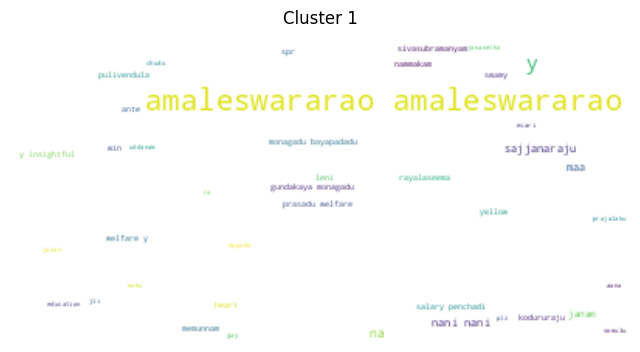

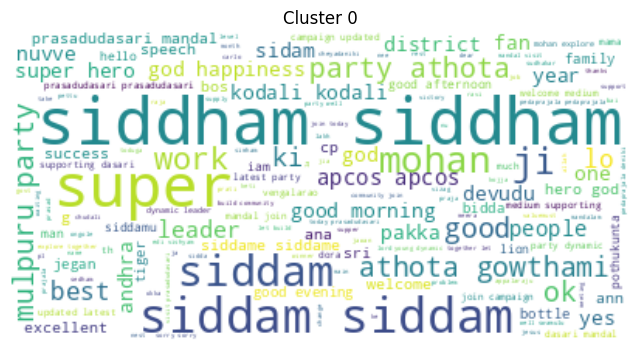

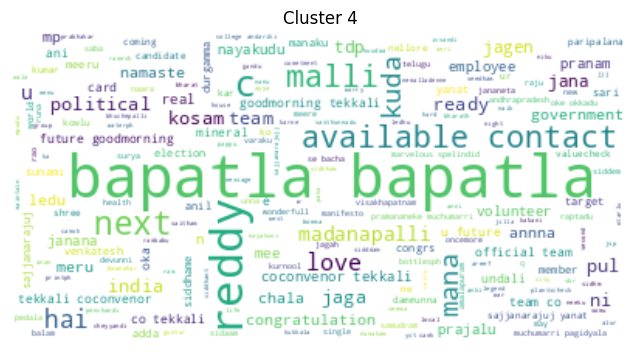

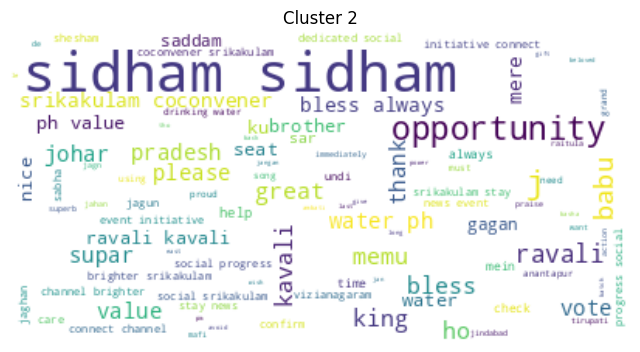

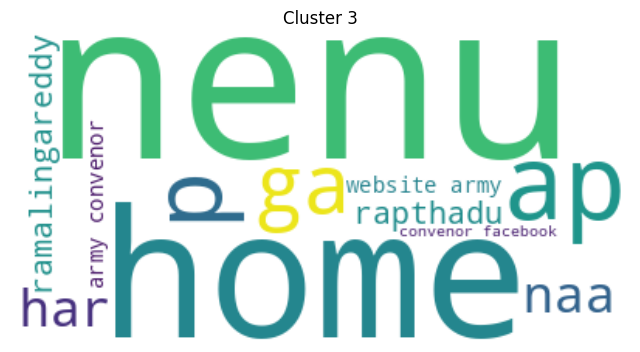

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Generate word clouds for each cluster
for cluster_label, documents in topics.items():
    # Combine all documents in the cluster
    cluster_text = ' '.join(documents)

    # Generate word cloud
    wordcloud = WordCloud(background_color='white').generate(cluster_text)

    # Plot word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {cluster_label}')
    plt.axis('off')
    plt.show()


In [49]:
# Print major topics
from collections import Counter
word_freq = Counter(cluster_text.split())
major_topics = word_freq.most_common(20)  # Select top 5 most common words
print(f"Major topics for Cluster {cluster_label}: {major_topics}")

Major topics for Cluster 3: [('nenu', 76), ('home', 47), ('ap', 43), ('p', 37), ('ga', 25), ('army', 13), ('website', 12), ('naa', 7), ('har', 7), ('rapthadu', 7), ('ramalingareddy', 7), ('convenor', 7), ('facebook', 7), ('httpswwwfacebookcomprofilephpidmibextidzbwkwl', 7), ('video', 7), ('youtube', 6), ('dont', 5), ('parti', 5), ('tq', 5), ('pls', 5)]


In [59]:
len(clean_corpus)

2820

Sentiment Analysis

In [60]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter

sentiment_labels_per_document = []

for i, document in enumerate(clean_corpus):
    text = ' '.join(document)
    blob = TextBlob(text)

    sentiment_label = 'Positive' if blob.sentiment.polarity > 0 else 'Negative' if blob.sentiment.polarity < 0 else 'Neutral'

    sentiment_labels_per_document.append(sentiment_label)

sentiment_counts = Counter(sentiment_labels_per_document)


labels = list(sentiment_counts.keys())
values = list(sentiment_counts.values())

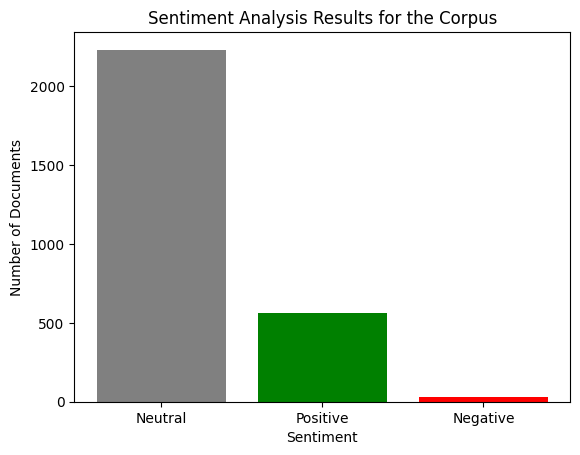

In [61]:
plt.bar(labels, values, color=['gray', 'green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Documents')
plt.title('Sentiment Analysis Results for the Corpus')
plt.show()

In [65]:
from textblob import TextBlob
from collections import Counter
positive_words = []

for document in clean_corpus:
    for word in document:
        blob = TextBlob(word)
        if blob.sentiment.polarity > 0:
            positive_words.append(word)

positive_word_counts = Counter(positive_words)

top_positive_words = positive_word_counts.most_common(20)


Top 20 words with positive sentiment:
super: 208
good: 72
available: 46
ok: 34
best: 29
love: 24
great: 24
welcome: 16
social: 14
happiness: 13
nice: 12
excellent: 11
ready: 11
success: 10
win: 8
real: 7
latest: 7
much: 6
supporting: 6
grand: 5


Top 20 Positive Words

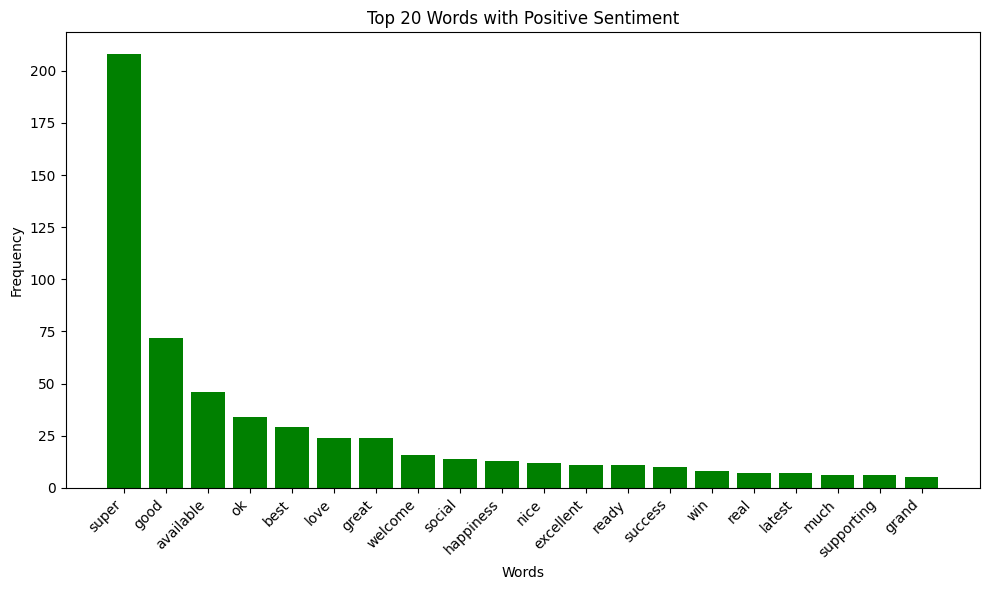

In [68]:
import matplotlib.pyplot as plt

top_positive_words = positive_word_counts.most_common(20)

words = [word[0] for word in top_positive_words]
counts = [word[1] for word in top_positive_words]

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words with Positive Sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 20 Negative Words

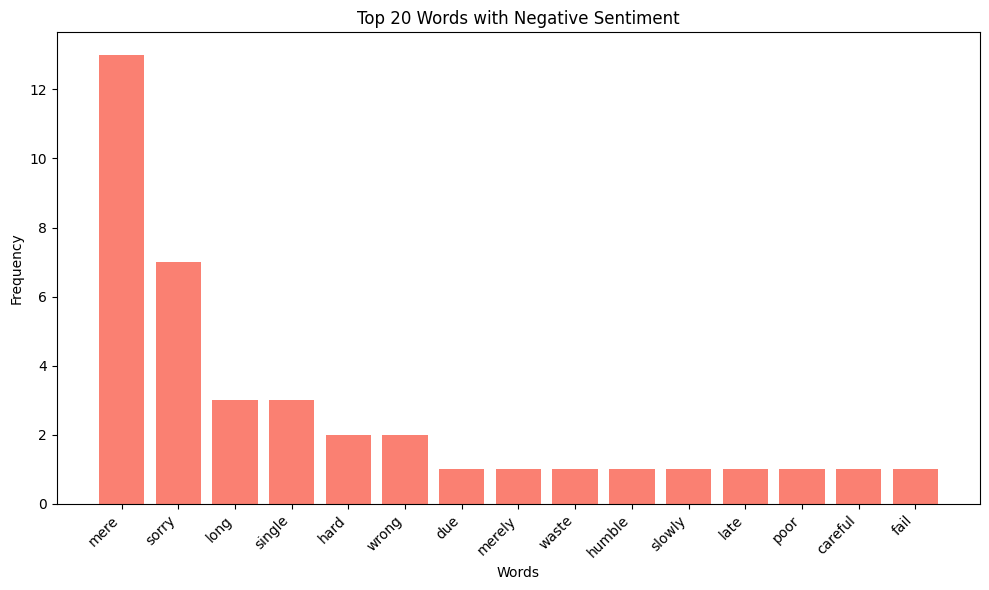

In [69]:
negative_words = []

for document in clean_corpus:
    for word in document:
        blob = TextBlob(word)
        if blob.sentiment.polarity < 0:
            negative_words.append(word)

negative_word_counts = Counter(negative_words)

top_negative_words = negative_word_counts.most_common(20)

negative_words = [word[0] for word in top_negative_words]
negative_counts = [word[1] for word in top_negative_words]

plt.figure(figsize=(10, 6))
plt.bar(negative_words, negative_counts, color='salmon')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words with Negative Sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [71]:
sentences_with_sorry = []

for item in corpus:
    if isinstance(item, str):
        if "sorry" in item.lower():
            sentences_with_sorry.append(item)
    else:
        for sentence in item:
            if isinstance(sentence, str):
                if "sorry" in sentence.lower():
                    sentences_with_sorry.append(sentence)

# Print the sentences containing the word "sorry"
for idx, sentence in enumerate(sentences_with_sorry, start=1):
    print(f"Sentence {idx}: {sentence}")



Sentence 1: sorry jai jagan
Sentence 2: sorry Jagan Sahab Anantapur Somnath Nagar 47 division voltage paneer cheyya ledu
Sentence 3: sorry sorry sorry sorry sorry Anna raleka poyanu
